In [1]:
!ln -s ../data/ ./
!ln -s ../out/ .

ln: failed to create symbolic link './data': File exists
ln: failed to create symbolic link './out': File exists


In [34]:
from __future__ import absolute_import, division, print_function

import os

import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

tf.__version__

'1.8.0'

In [36]:
path = "./data/"

In [2]:
train = pd.read_csv('data/Train_data/dataset_rev4_train.csv')

#Remove column ที่มี type เป็น object นั่นคือคอลัม datetime, date, และ time
train = train.select_dtypes(exclude=['object'])

#แทนที่ misssing value ด้วย 0
train.fillna(0,inplace=True)

In [3]:
#โหลด csv ไพล์สำหรับเป็น unseen data เพื่อใช้ทดสอบโมเดล#โหลด cs 
test = pd.read_csv('data/test_data/dataset_rev4_test.csv')

#เก็บ column datetime ไว้ในตัวแปรที่ชื่อ buffer_datetime_train เพื่อ ...
buffer_datetime_test = test.datetime

#Remove column ที่มี type เป็น object
test = test.select_dtypes(exclude=['object'])

#แทนที่ misssing value ด้วย 0
test.fillna(0,inplace=True)

In [4]:
print('dimension of train:', train.shape)
print('dimension of test:', test.shape)

dimension of train: (131586, 6)
dimension of test: (16147, 5)


In [5]:
print("features:",list(train.columns))

features: ['I', 'T', 'UV', 'WS', 'RH', 'P']


In [6]:
#import library ที่ชื่อ IsolationForest
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples = 100, random_state = 42)

clf.fit(train)

y_noano = clf.predict(train)

y_noano = pd.DataFrame(y_noano, columns = ['Top'])

y_noano[y_noano['Top'] == 1].index.values

train = train.iloc[y_noano[y_noano['Top'] == 1].index.values]

train.reset_index(drop = True, inplace = True)

#จำนวนของ Outliers
print("Number of Outliers:", y_noano[y_noano['Top'] == -1].shape[0])

#จำนวนของแถวที่ไม่มี outliers
print("Number of rows without outliers:", train.shape[0])

Number of Outliers: 13159
Number of rows without outliers: 118427


In [7]:
#import libray ที่ชื่อ warnings
import warnings

#ใช้ class ที่ชื่อว่า filterwarnings
warnings.filterwarnings('ignore')

#สร้าง list ของคอลัมในแปร train เก็บไว้ในตัวแปร col_train 
col_train = list(train.columns)

#สร้าง list ของคอลัมในแปร train เก็บไว้ในตัวแปร col_train_bis
col_train_bis = list(train.columns)

#ใน list ของตัวแปรที่ชื่อ col_train_bis ลบ element ที่ชื่อ P ออก
col_train_bis.remove('P')

#แปลง type ของตัวแปร train จาก dataframe เป็น matrix
mat_train = np.matrix(train)

#แปลง type ของตัวแปร test จาก dataframe เป็น matrix
mat_test  = np.matrix(test)

#Drop คอลัม P ในตัวแปร train แล้วเปลี่ยน type ของ train จาก dataframe เป็น matrix แล้วเก็บในตัวแปรที่ชื่อ mat_new
mat_new = np.matrix(train.drop('P',axis = 1))

#เอาคอลัมที่ชื่อ P ในตัวแปร train มาแปลงให้เป็น array แล้ว reshape ให้เป็น (118427,1) เก็บไว้ในตัวปรที่ชื่อ mat_y
mat_y = np.array(train.P).reshape((118427,1))

#ให้ prepro_y เป็นฟังก์ชัน MinMaxScaler()
prepro_y = MinMaxScaler()

#คำนวณ μ และ σ ของ mat_y
prepro_y.fit(mat_y)

#ให้ prepro เป็นฟังก์ชัน MinMaxScaler()
prepro = MinMaxScaler()

#คำนวณ μ และ σ ของ mat_train
prepro.fit(mat_train)

#ให้ prepro_test เป็นฟังก์ชัน MinMaxScaler()
prepro_test = MinMaxScaler()

#คำนวณ μ และ σ ของ mat_new
prepro_test.fit(mat_new)

#นำ μ และ σ ของ prepro กระทำกับทุก element ใน mat_train แล้วสร้างเป็น data frame ที่มีชื่อคอลัมตาม list col_train และเก็บใส่ตัวแปร train
train = pd.DataFrame(prepro.transform(mat_train),columns = col_train)

#นำ μ และ σ ของ prepro_test กระทำกับทุก element ใน mat_train แล้วสร้างเป็น data frame ที่มีชื่อคอลัมตาม list col_train และเก็บใส่ตัวแปร train
test  = pd.DataFrame(prepro_test.transform(mat_test),columns = col_train_bis)

In [8]:
# สร้าง List ของ features

#นำ list ของคอลัม ที่อยู่ในตัวแปร col_train มาไว้ในตัวแปร COLUMNS
COLUMNS = col_train

#นำ list ของคอลัม ที่อยู่ในตัวแปร col_train_bis มาไว้ในตัวแปร FEATURES
FEATURES = col_train_bis  #column train-label (x test)</font>

#นำตัวแปร P มาเก็บไว้ในตัวแปร LABEL
LABEL = "P"

# สร้าง list ของ feature
feature_cols = FEATURES 

# สร้าง Training set และ Prediction set 
training_set = train[COLUMNS] 
prediction_set = train.P

In [10]:
print(type(training_set))
print(type(prediction_set))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [12]:
train_data, test_data, train_labels, test_labels = train_test_split(training_set[FEATURES] , prediction_set, test_size=0.33, random_state=42)

In [13]:
print(type(train_data))
print(type(test_data))
print(type(train_labels))
print(type(test_labels))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [15]:
print(train_data.shape)
print(test_data.shape)
print(train_labels.shape)
print(test_labels.shape)

(79346, 5)
(39081, 5)
(79346,)
(39081,)


In [16]:
train_data = train_data.values
test_data = test_data.values
train_labels = train_labels.values
test_labels = test_labels.values

In [17]:
order = np.argsort(np.random.random(train_labels.shape))
train_data = train_data[order]
train_labels = train_labels[order]

In [18]:
print("Training set: {}".format(train_data.shape))  
print("Testing set:  {}".format(test_data.shape))

Training set: (79346, 5)
Testing set:  (39081, 5)


In [20]:
column_names = ['I', 'T', 'UV', 'WS', 'RH']
df = pd.DataFrame(train_data, columns=column_names)
df.head(2)

,I,T,UV,WS,RH
0,0.174312,0.444444,0.039216,0.422652,0.725225
1,0.062385,0.020576,0.019608,0.099448,0.896396


In [21]:
print(train_labels[0:10])  # Display first 10 entries

[0.09016393 0.04918033 0.30327869 0.09836066 0.57786885 0.42213115
 0.31147541 0.70491803 0.22131148 0.        ]


In [24]:
def build_model():
  model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu, input_shape=(train_data.shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])

  optimizer = tf.train.RMSPropOptimizer(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
  return model

model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                384       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 4,609
Trainable params: 4,609
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Display training progress by printing a single dot for each completed epoch.
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500

# Store training stats
history = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

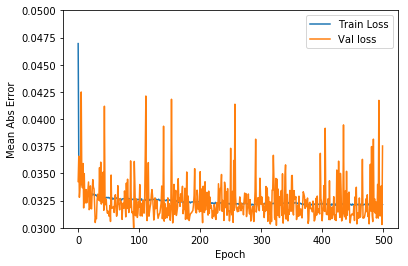

In [28]:
import matplotlib.pyplot as plt

def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(history.epoch, np.array(history.history['mean_absolute_error']), 
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
  plt.legend()
  plt.ylim([0.03,0.05])

plot_history(history)

In [30]:
# Predict# Predic 
pred = model.predict(test_data)

In [35]:
# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,test_labels))
print(f"Before save score (RMSE): {score}")

Before save score (RMSE): 0.05982191145682268


In [37]:
# save neural network structure to JSON (no weights)
model_json = model.to_json()
with open(os.path.join(path,"R14_model.json"), "w") as json_file:
    json_file.write(model_json)

In [38]:
# save neural network structure to YAML (no weights)
model_yaml = model.to_yaml()
with open(os.path.join(path,"R14_model.yaml"), "w") as yaml_file:
    yaml_file.write(model_yaml)

In [39]:
# save entire network to HDF5 (save everything, suggested)# save e 
model.save(os.path.join(path,"R14_model.h5"))

In [41]:
from keras.models import load_model
model2 = load_model(os.path.join(path,"R14_model.h5"))
pred = model2.predict(test_data)
# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,test_labels))
print(f"After load score (RMSE): {score}")

After load score (RMSE): 0.05982191145682268


# The patience parameter is the amount of epochs to check for improvement


.........................................

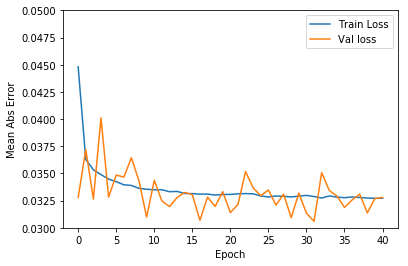

In [42]:
model_14_2 = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history_14_2 = model_14_2.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[early_stop, PrintDot()])

plot_history(history_14_2)

In [43]:
# Predict# Predic 
pred = model_14_2.predict(test_data)

In [44]:
# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,test_labels))
print(f"Before save score (RMSE): {score}")

Before save score (RMSE): 0.05817247021864683


In [45]:
# save neural network structure to JSON (no weights)
model_json = model.to_json()
with open(os.path.join(path,"R14_2_model.json"), "w") as json_file:
    json_file.write(model_json)

In [46]:
# save neural network structure to YAML (no weights)
model_yaml = model.to_yaml()
with open(os.path.join(path,"R14_2_model.yaml"), "w") as yaml_file:
    yaml_file.write(model_yaml)

In [47]:
# save entire network to HDF5 (save everything, suggested)# save e 
model.save(os.path.join(path,"R14_2_model.h5"))

In [48]:
from keras.models import load_model
model2 = load_model(os.path.join(path,"R14_2_model.h5"))
pred = model2.predict(test_data)
# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,test_labels))
print(f"After load score (RMSE): {score}")

After load score (RMSE): 0.05982191145682268
